In [1]:
from cluster_g_logit_init_acceptpsi import *
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/filesforupload/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()



Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_89362/2037145194.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/v

Loaded all components successfully!


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 16 diseases
Cluster 1: 21 diseases
Cluster 2: 15 diseases
Cluster 3: 82 diseases
Cluster 4: 5 diseases
Cluster 5: 7 diseases
Cluster 6: 8 diseases
Cluster 7: 22 diseases
Cluster 8: 28 diseases
Cluster 9: 12 diseases
Cluster 10: 11 diseases
Cluster 11: 8 diseases
Cluster 12: 7 diseases
Cluster 13: 13 diseases
Cluster 14: 10 diseases
Cluster 15: 5 diseases
Cluster 16: 29 diseases
Cluster 17: 17 diseases
Cluster 18: 9 diseases
Cluster 19: 23 diseases
Initialization complete!

Using psi configuration
Initialization complete!


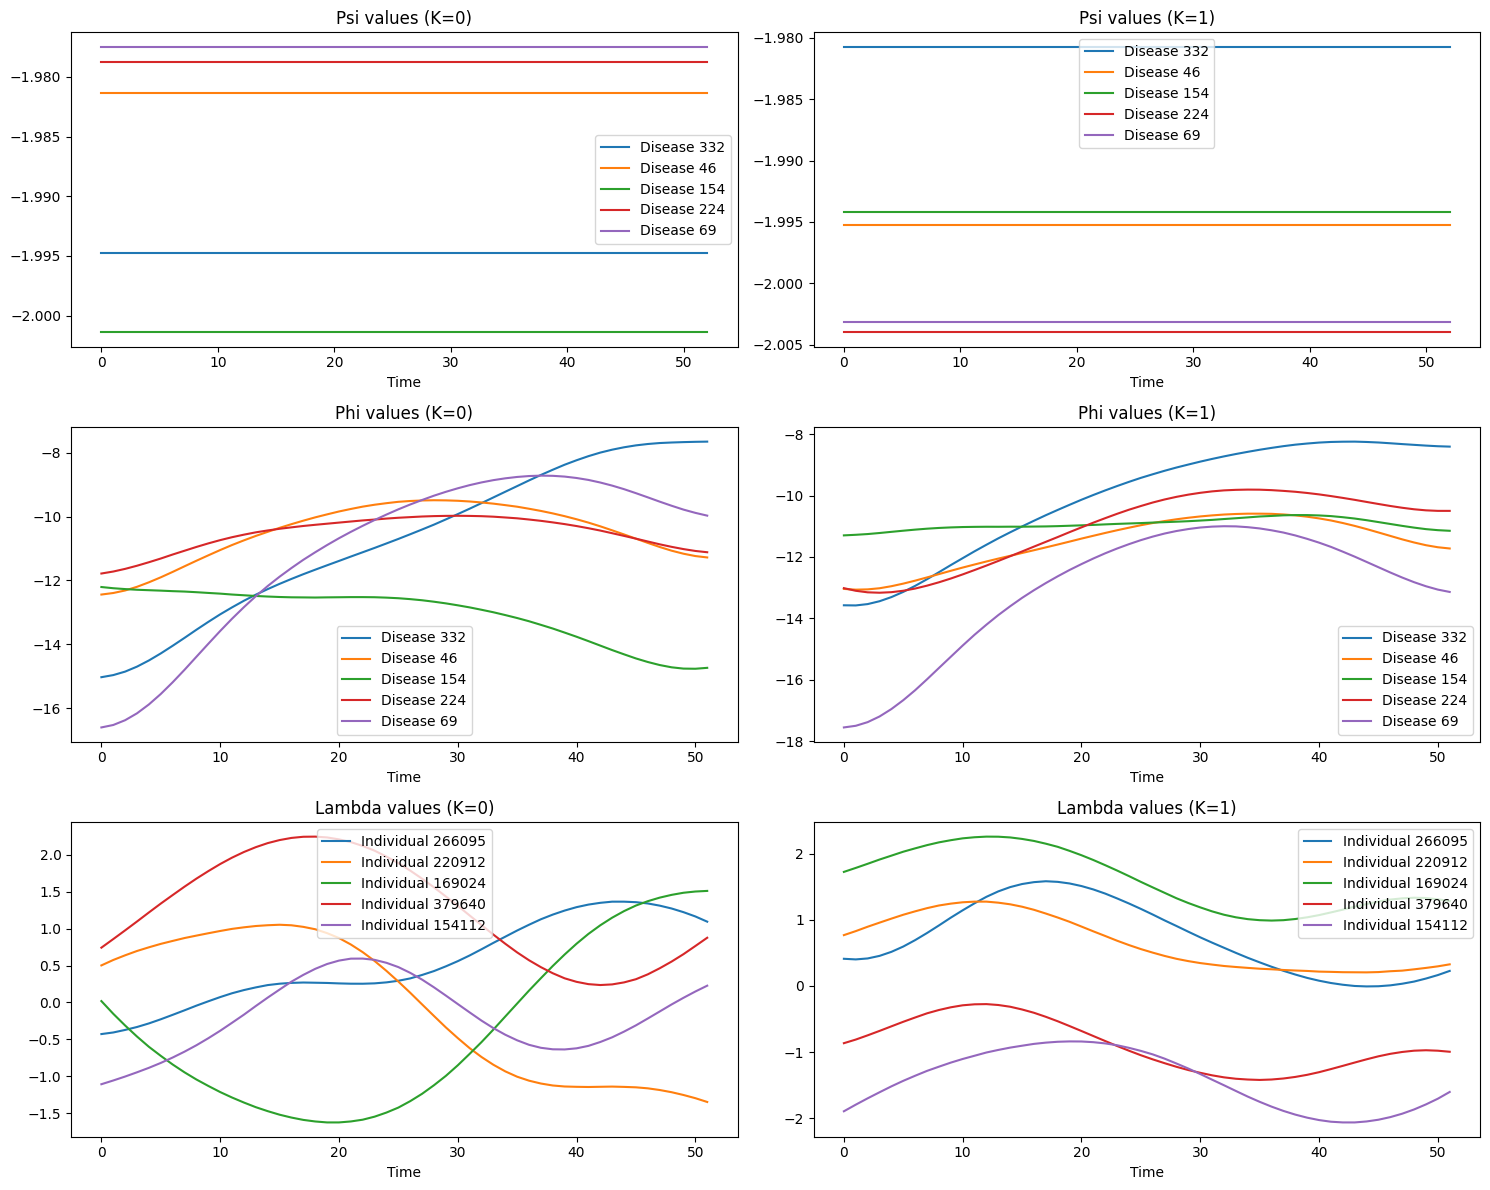


Cluster membership for sampled diseases:
Disease 332: Cluster 7
Disease 46: Cluster 15
Disease 154: Cluster 3
Disease 224: Cluster 3
Disease 69: Cluster 3


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:617: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


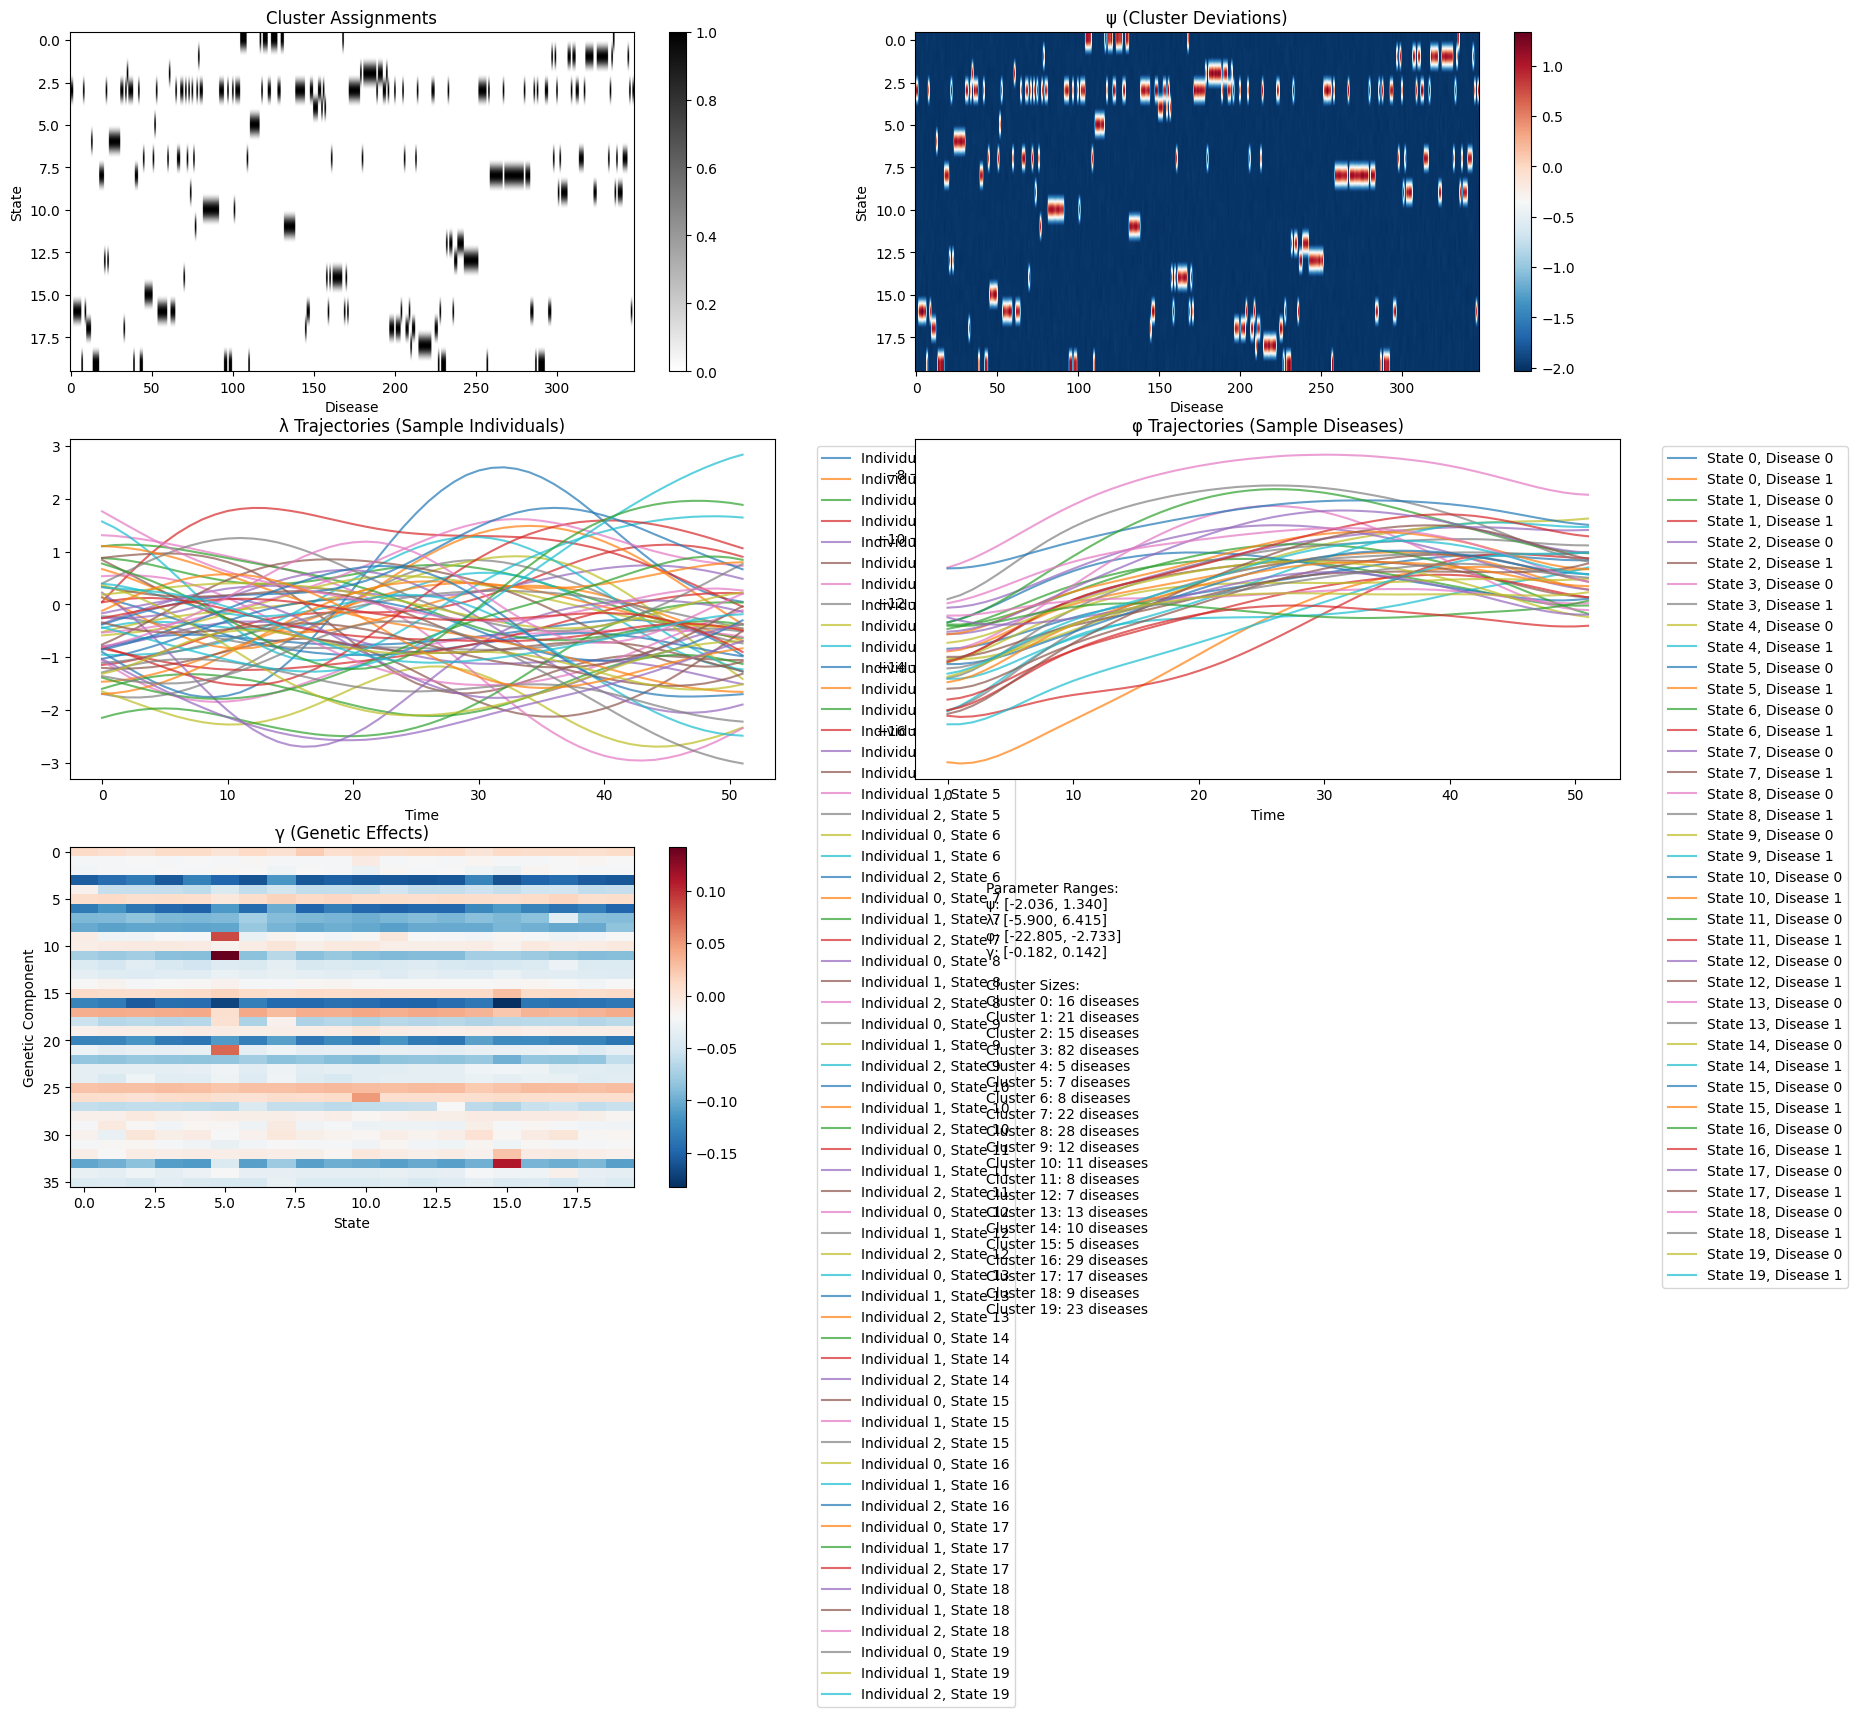

In [2]:

psi_config = {'in_cluster': 1, 'out_cluster': -2, 'noise_in': 0.1, 'noise_out': 0.01}

disease_names=essentials['disease_names']
disease_names_list = disease_names[0].tolist()

model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
N=Y.shape[0],
D=Y.shape[1],
T=Y.shape[2],
K=essentials['K'],
P=essentials['P'],
G=G,
Y=Y,
prevalence_t=essentials['prevalence_t']
)

model.initialize_params(psi_config=psi_config)
model.plot_initial_params()
model.visualize_initialization()




Cluster Assignments:

Cluster 0:
  - Rheumatic disease of the heart valves (prevalence: 0.0002)
  - Mitral valve disease (prevalence: 0.0004)
  - Aortic valve disease (prevalence: 0.0002)
  - Disease of tricuspid valve (prevalence: 0.0002)
  - Other forms of chronic heart disease (prevalence: 0.0004)
  - Cardiomegaly (prevalence: 0.0005)
  - Pericarditis (prevalence: 0.0002)
  - Primary/intrinsic cardiomyopathies (prevalence: 0.0001)
  - Left bundle branch block (prevalence: 0.0003)
  - Paroxysmal supraventricular tachycardia (prevalence: 0.0002)
  - Paroxysmal ventricular tachycardia (prevalence: 0.0001)
  - Atrial fibrillation and flutter (prevalence: 0.0010)
  - Congestive heart failure (CHF) NOS (prevalence: 0.0004)
  - Heart failure NOS (prevalence: 0.0007)
  - Pleurisy; pleural effusion (prevalence: 0.0009)
  - Congenital anomalies of great vessels (prevalence: 0.0003)

Cluster 1:
  - Other peripheral nerve disorders (prevalence: 0.0010)
  - Rheumatoid arthritis (prevalence: 0.0

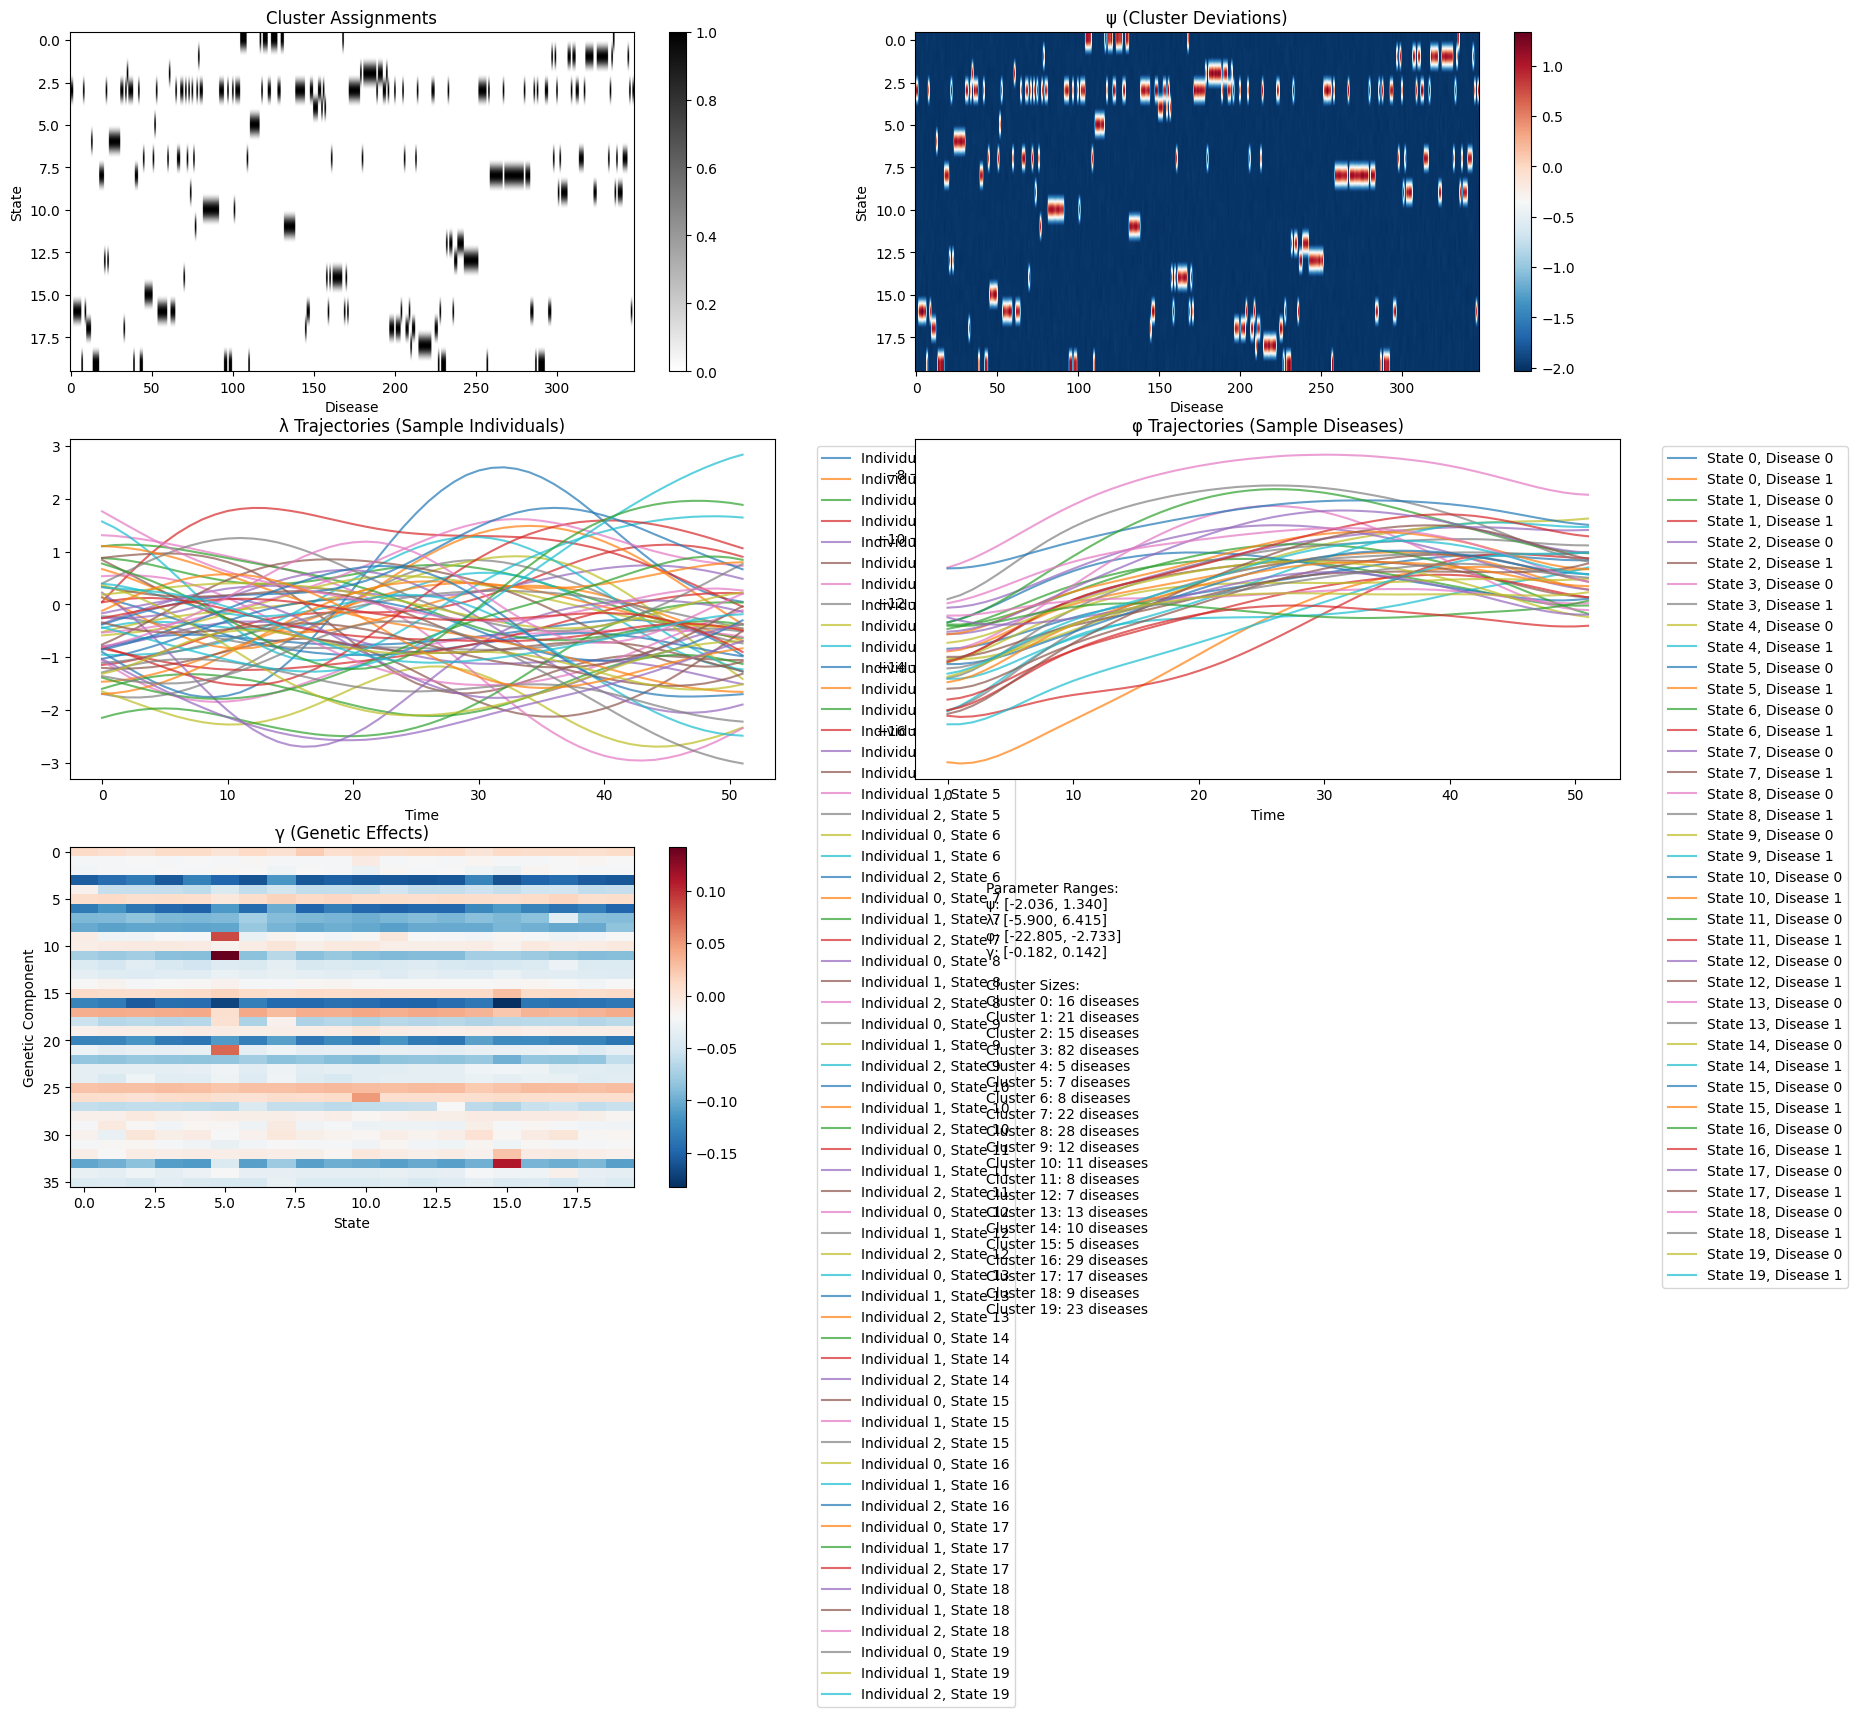

In [3]:
# Visualize the clusters

model.visualize_clusters(disease_names_list)
model.visualize_initialization()

In [5]:
model.psi

Parameter containing:
tensor([[-2.0109, -1.9881, -2.0055,  ..., -1.9858, -1.9906, -2.0038],
        [-2.0059, -2.0159, -2.0103,  ..., -1.9957, -1.9946, -2.0056],
        [-2.0034, -1.9887, -2.0166,  ..., -2.0016, -1.9950, -2.0138],
        ...,
        [-2.0102, -1.9915, -1.9927,  ..., -1.9769, -2.0060, -1.9856],
        [-1.9937, -1.9900, -2.0035,  ..., -2.0037, -2.0162, -1.9926],
        [-2.0028, -1.9924, -2.0071,  ..., -2.0089, -2.0038, -1.9978]],
       requires_grad=True)

In [14]:
initial_psi = model.psi.detach().clone()

# Run for just 10 epochs to check behavior
# First, save the psi from your 400K initialization
torch.save(model.psi.detach(), 'initial_psi_400k.pt')

# For the 50K batches, load and use this psi:
initial_psi = torch.load('initial_psi_400k.pt')
# don't run below this line, computer will crash

initial_psi.shape

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_89362/2769727839.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('initial_psi_400k.pt

torch.Size([20, 348])

In [8]:
def subset_data(Y, E, G, n_samples=50000, seed=42):
    """
    Subset the data to n_samples individuals while maintaining consistency
    
    Args:
        Y: tensor of shape [N, D, T]
        E: tensor of shape [N, D]
        G: tensor of shape [N, P]
        n_samples: number of individuals to keep
        seed: random seed for reproducibility
    
    Returns:
        Y_sub, E_sub, G_sub: subsetted tensors
    """
    torch.manual_seed(seed)
    
    # Get total number of individuals
    N = Y.shape[0]
    
    # Randomly select n_samples indices
    indices = torch.randperm(N)[:n_samples]
    
    # Subset all matrices using the same indices
    Y_sub = Y[indices]
    E_sub = E[indices]
    G_sub = G[indices]
    
    print(f"Original shapes: Y={Y.shape}, E={E.shape}, G={G.shape}")
    print(f"New shapes: Y={Y_sub.shape}, E={E_sub.shape}, G={G_sub.shape}")
    
    return Y_sub, E_sub, G_sub, indices

# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, n_samples=10000)


Original shapes: Y=torch.Size([407878, 348, 52]), E=torch.Size([407878, 348]), G=(407878, 36)
New shapes: Y=torch.Size([10000, 348, 52]), E=torch.Size([10000, 348]), G=(10000, 36)


In [11]:
model_batch = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0],
    D=Y_100k.shape[1],
    T=Y_100k.shape[2],
    K=essentials['K'],
    P=essentials['P'],
    G=G_100k,
    Y=Y_100k,
    prevalence_t=essentials['prevalence_t']
)

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 11 diseases
Cluster 1: 74 diseases
Cluster 2: 30 diseases
Cluster 3: 7 diseases
Cluster 4: 23 diseases
Cluster 5: 10 diseases
Cluster 6: 17 diseases
Cluster 7: 14 diseases
Cluster 8: 21 diseases
Cluster 9: 5 diseases
Cluster 10: 8 diseases
Cluster 11: 9 diseases
Cluster 12: 12 diseases
Cluster 13: 31 diseases
Cluster 14: 25 diseases
Cluster 15: 5 diseases
Cluster 16: 9 diseases
Cluster 17: 17 diseases
Cluster 18: 11 diseases
Cluster 19: 9 diseases
Initialization complete!


In [12]:
# When initializing the model for 50K batches:
initial_psi = torch.load('initial_psi_400k.pt')

model_batch.initialize_params(true_psi=initial_psi)

# Verify the psi values match
print("Psi values match:", torch.allclose(model_batch.psi, initial_psi))


Using true psi from simulation
Initialization complete!
Psi values match: True


Psi values match: True

Parameter shapes:
Lambda: torch.Size([10000, 20, 52])
Phi: torch.Size([20, 348, 52])
Gamma: torch.Size([36, 20])


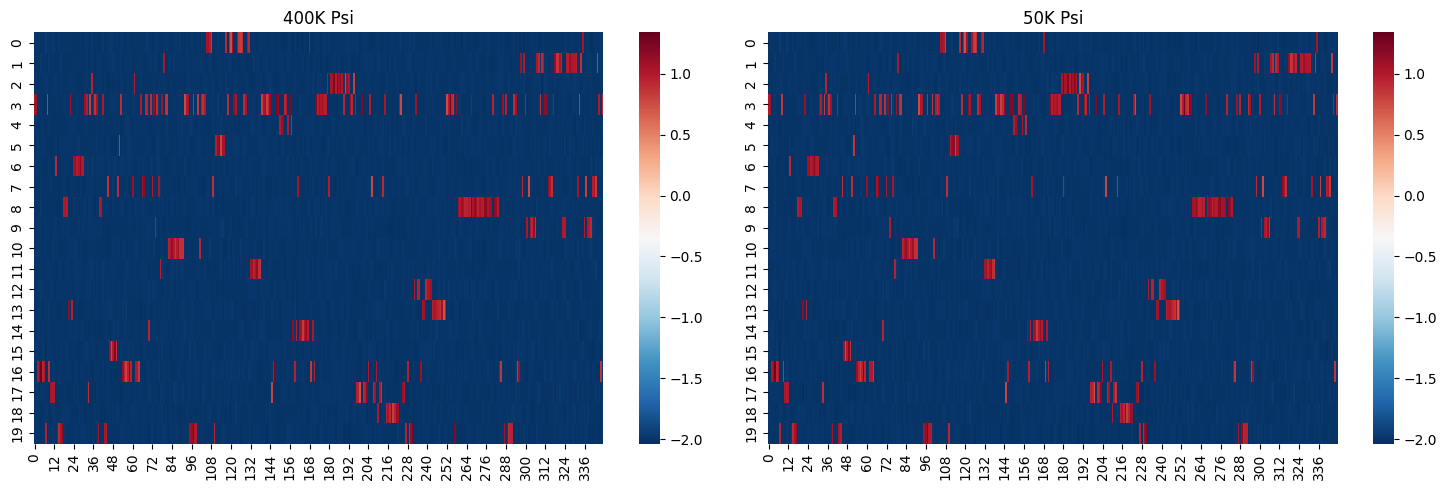

True

In [13]:
def verify_initialization(model_400k, model_50k):
    """Verify that the 50K model initialized correctly with 400K psi"""
    
    # Check psi values match
    psi_match = torch.allclose(model_400k.psi, model_50k.psi)
    print("Psi values match:", psi_match)
    
    # Check shapes of other parameters
    print("\nParameter shapes:")
    print(f"Lambda: {model_50k.lambda_.shape}")
    print(f"Phi: {model_50k.phi.shape}")
    print(f"Gamma: {model_50k.gamma.shape}")
    
    # Visualize both initializations
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    sns.heatmap(model_400k.psi.detach().numpy(), cmap='RdBu_r')
    plt.title("400K Psi")
    
    plt.subplot(122)
    sns.heatmap(model_50k.psi.detach().numpy(), cmap='RdBu_r')
    plt.title("50K Psi")
    
    plt.tight_layout()
    plt.show()
    
    return psi_match

verify_initialization(model, model_batch)